# **PROJECT Machine Learning** 

# **- Fernando Asikin (2301870142)**
# **- Stefanus Hermawan Sebastian (2301878605)**
# **- Matthew Liem (2301873182)**

In [ ]:
#Melakukan import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
#Melakukan pengecekan data df 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Mengecek di df apakah ada data null atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Dari info yang tertera diatas dapat dilihat bahwa data tidak memiliki nilai null ataupun nilai yang tidak bisa dibaca**

# **Pre-Processing Data**

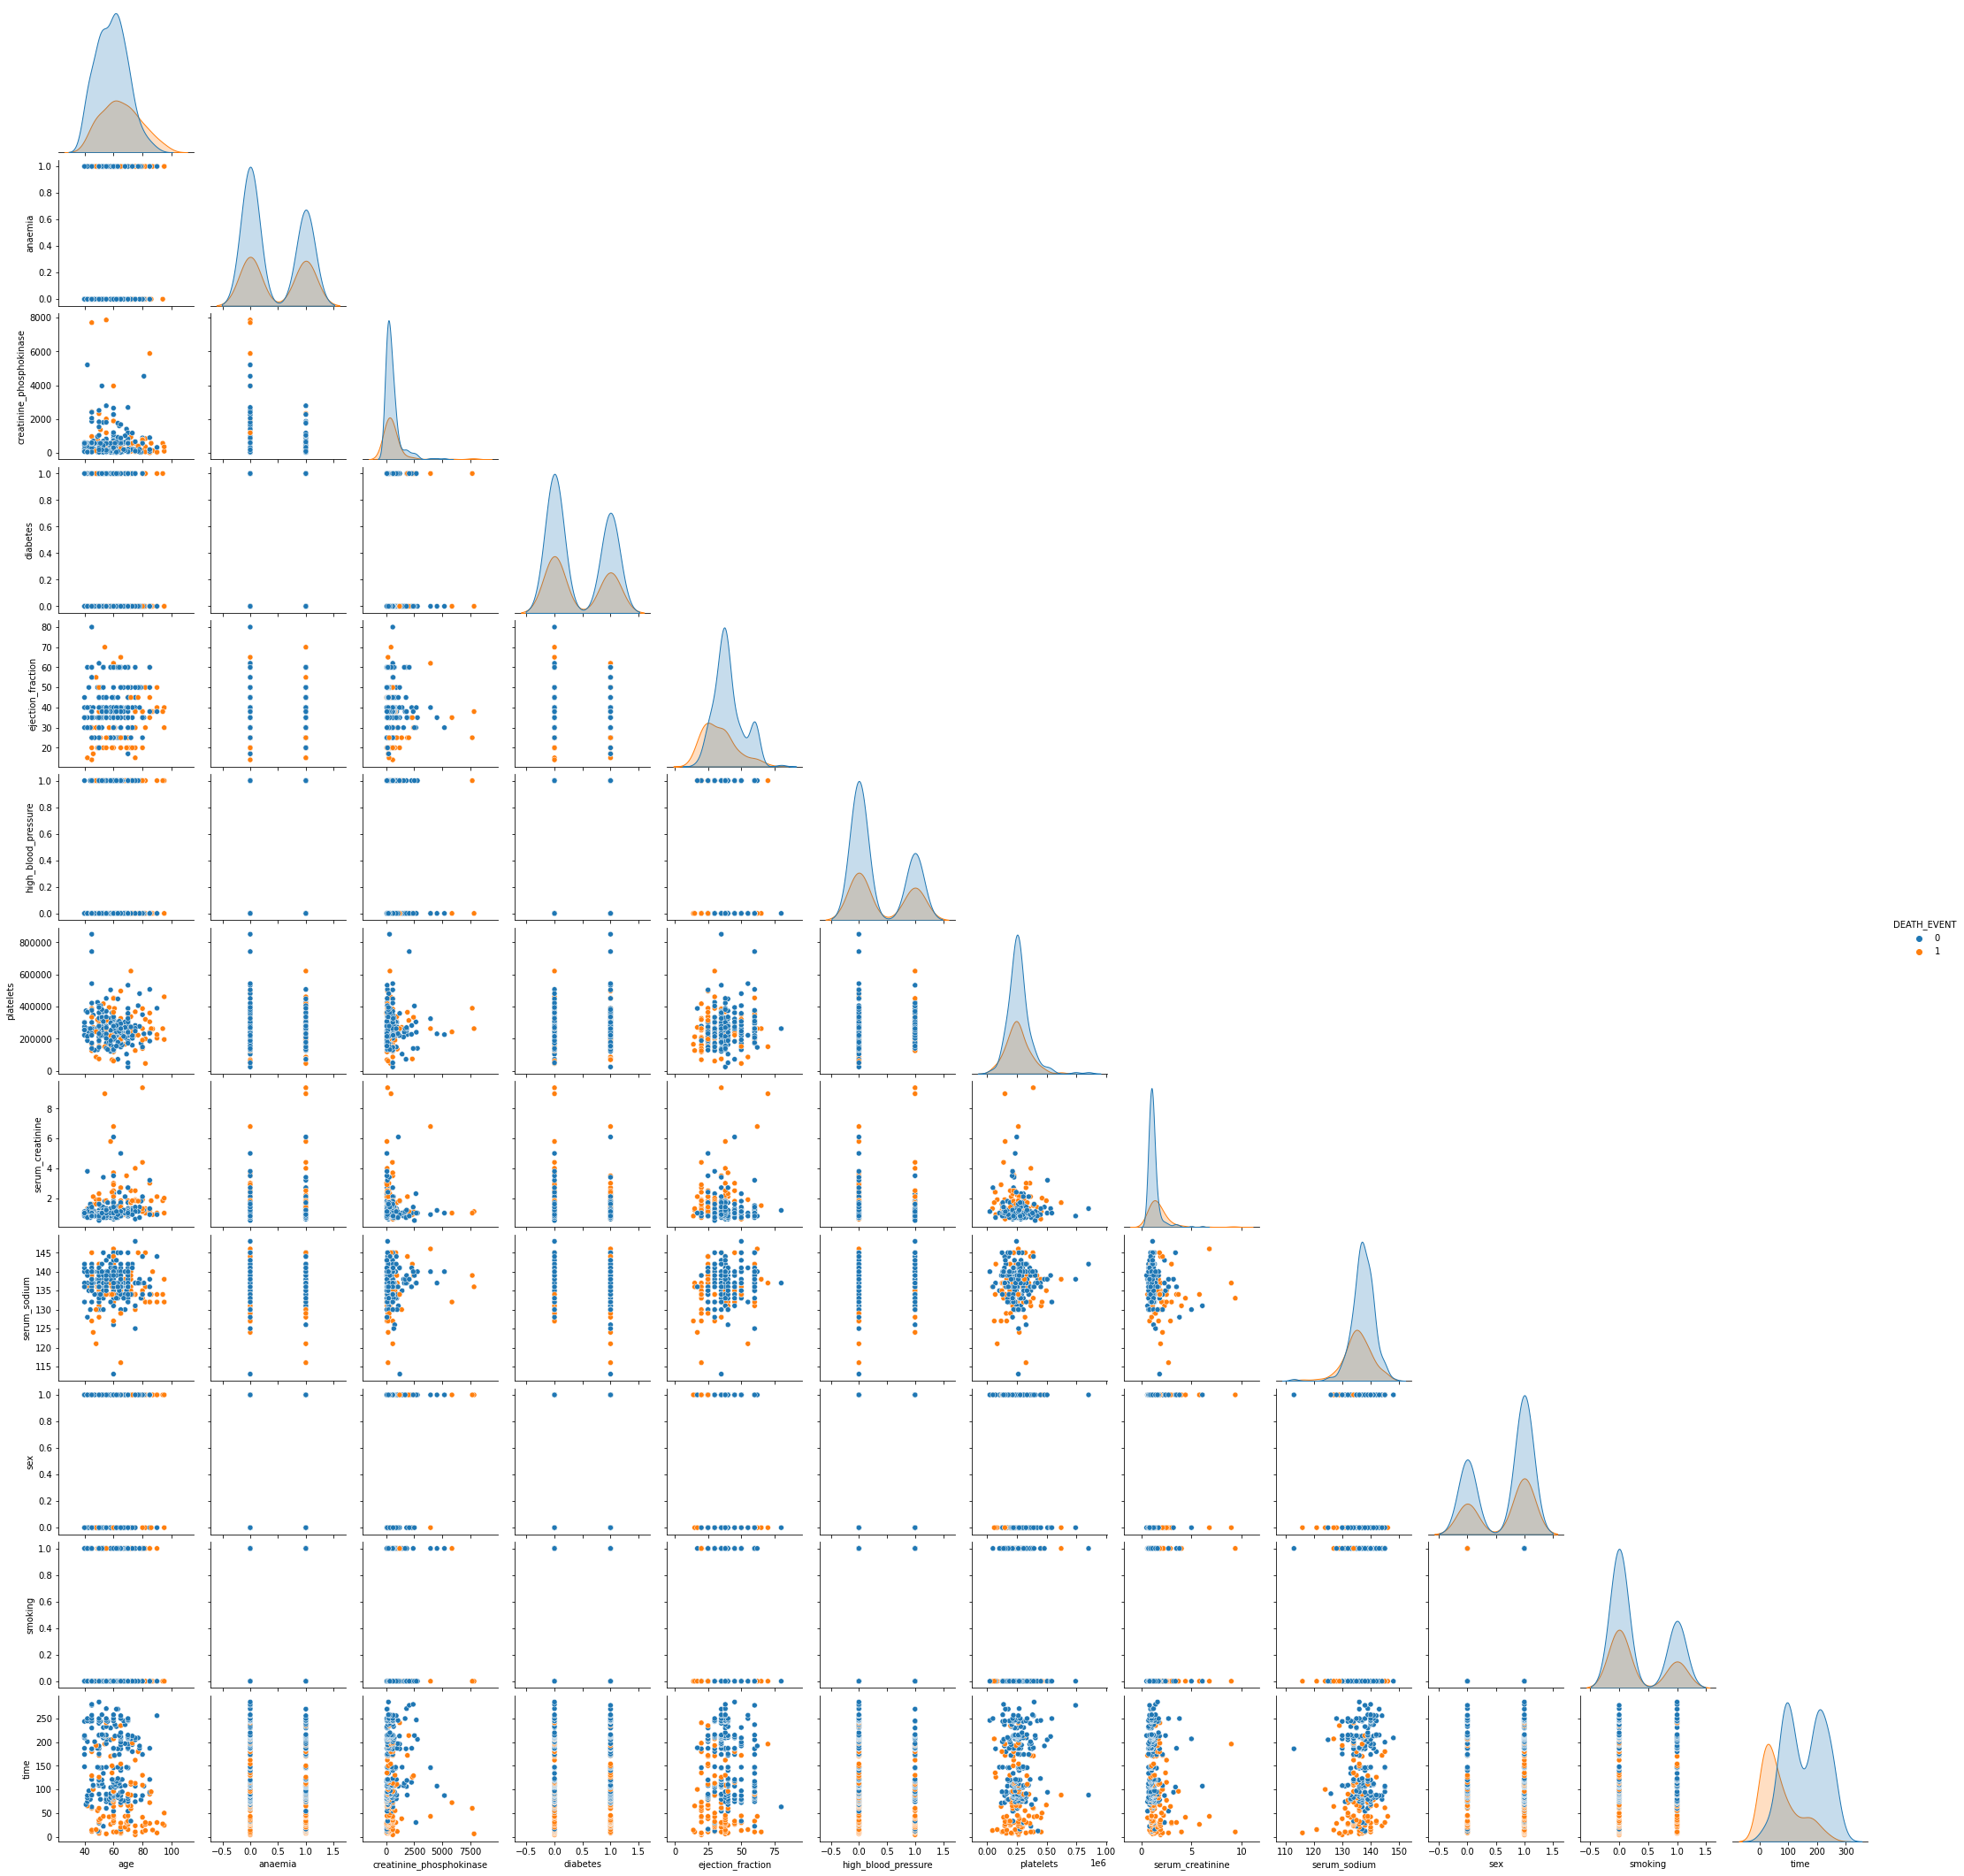

In [ ]:
#Melakukan visualisasi plot antara fitur dengan tingkat 'Death Event'
sns.pairplot(df, hue ='DEATH_EVENT', corner = True)
plt.show()

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

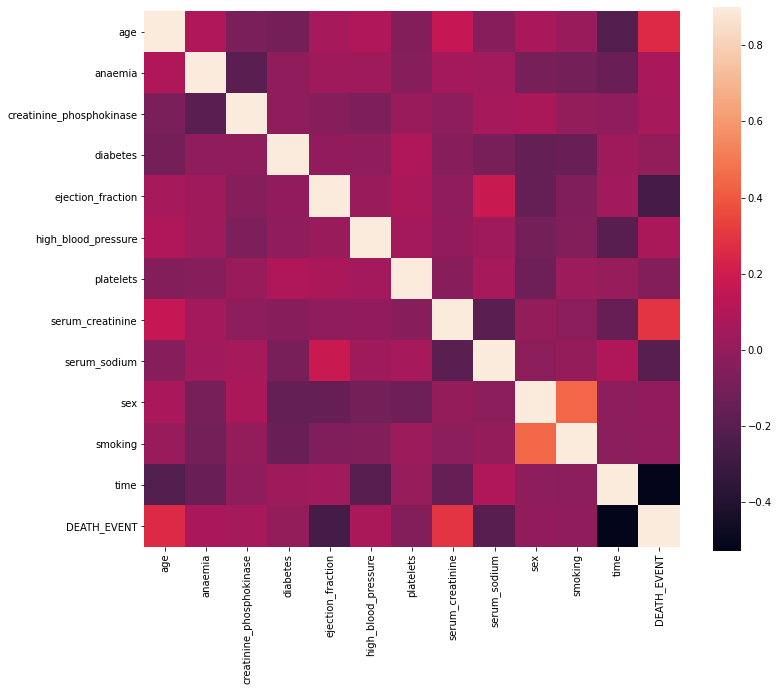

In [ ]:
#Mencoba untuk melakukan visualisasi heatmap fitur-fitur dengan death event
corr = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr, vmax=0.9, square=True)

corr['DEATH_EVENT']

*Berdasarkan plot data yang ada diatas, maka kami memutuskan untuk menganalisa data yang ada di dalam dataset untuk menentukan kekuatan korelasi fitur-fitur dengan 'DEATH_EVENT'. Tentunya dengan semakin kuatnya suatu korelasi dapat memberikan tingkat akurasi yang lebih baik.*

In [ ]:
df_selected = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]

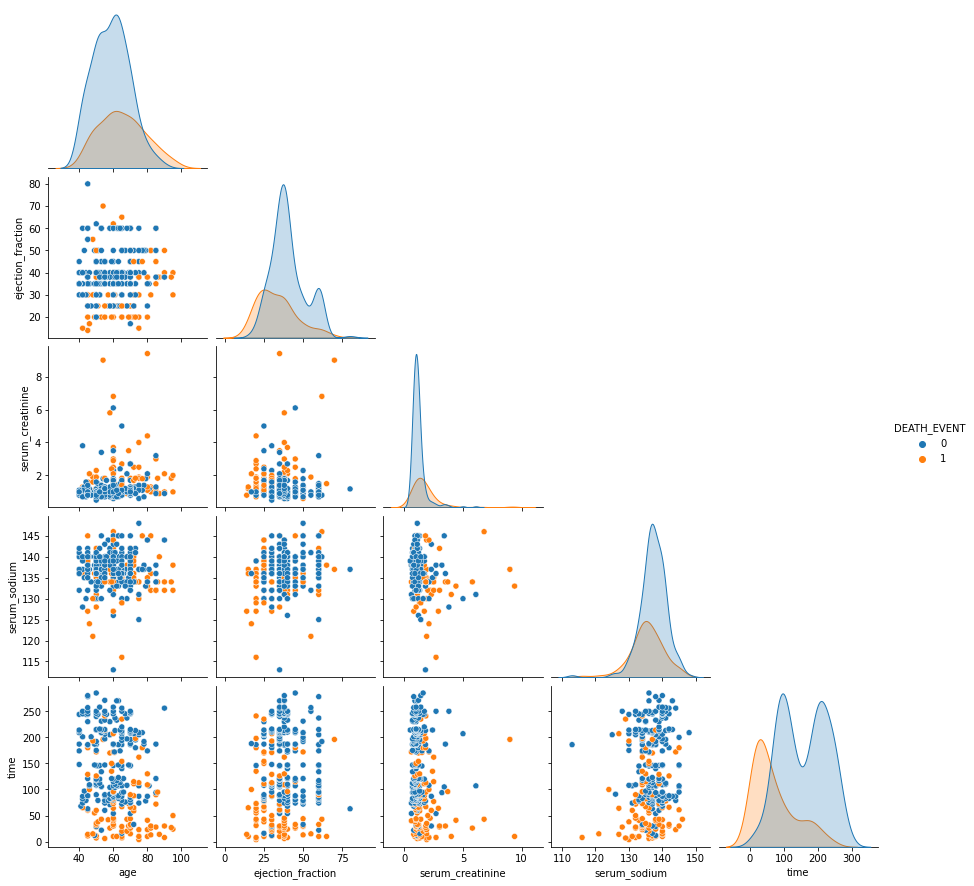

In [ ]:
sns.pairplot(df_selected, hue ='DEATH_EVENT', corner = True)
plt.show()

In [ ]:
x_selected = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y_selected = df['DEATH_EVENT']

# Clean (Not Selected & Clean)

# **MELAKUKAN ANALISA DATA**

In [ ]:
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# Selected_Clean(Selected & Clean)

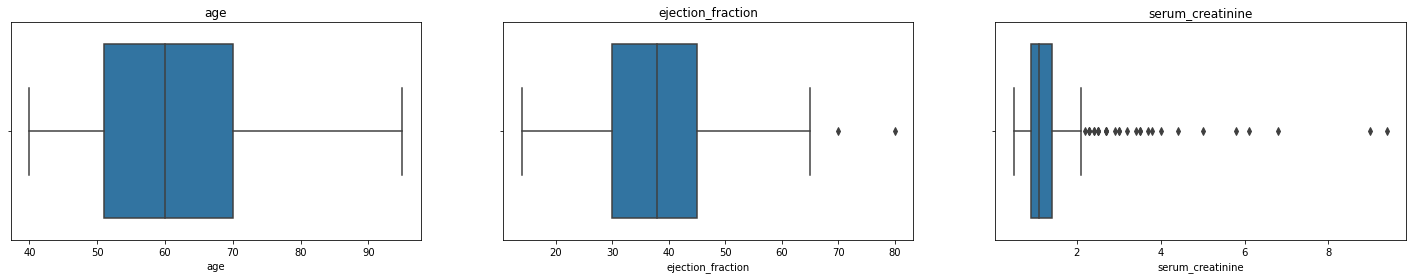

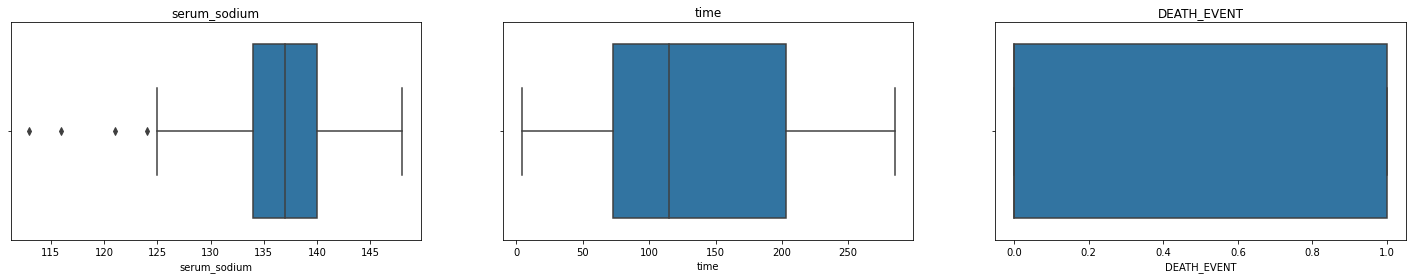

In [ ]:
max_row = 3
z=0
for i in df_selected:
    plt.figure(z//max_row, figsize=(25,4))
    plt.subplot(1, max_row, (z)%max_row + 1)
    plt.title(i)
    sns.boxplot(df_selected[i],orient='v')
    z += 1

# menghilangkan outliers pada ejection_fraction dari df_selected

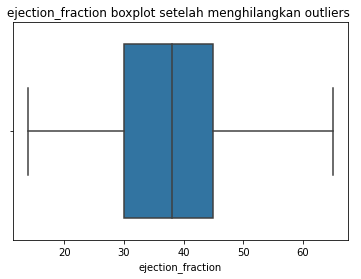

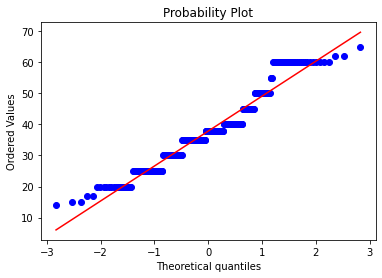

In [ ]:
df_copy = df_selected.copy()

var_out1 = df_copy.ejection_fraction.quantile(.25)
var_out2 = df_copy.ejection_fraction.quantile(.75)
IQR = var_out2 - var_out1
filter = (df_copy.ejection_fraction >= var_out1 - 1.5 * IQR) & (df_copy.ejection_fraction <= var_out2 + 1.5 *IQR)

sns.boxplot(df_copy.loc[filter].ejection_fraction,orient='v')
plt.title('ejection_fraction boxplot setelah menghilangkan outliers ')
fig = plt.figure()

res = stats.probplot(df_copy.loc[filter].ejection_fraction, plot=plt)
plt.show()
df_copy.ejection_fraction = df_copy[filter]

# menghilangkan outliers pada serum_creatinine dari df_selected

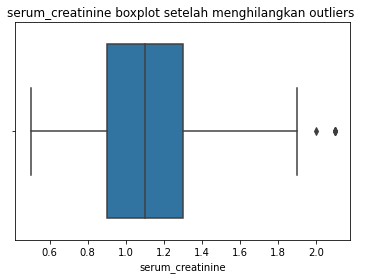

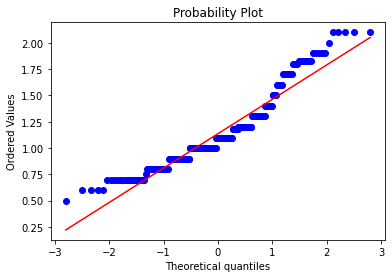

In [ ]:
var_out1 = df_copy.serum_creatinine.quantile(.25)
var_out2 = df_copy.serum_creatinine.quantile(.75)
IQR = var_out2 - var_out1
filter = (df_copy.serum_creatinine >= var_out1 - 1.5 * IQR) & (df_copy.serum_creatinine <= var_out2 + 1.5 *IQR)

sns.boxplot(df_copy.loc[filter].serum_creatinine,orient='v')
plt.title('serum_creatinine boxplot setelah menghilangkan outliers ')
fig = plt.figure()

res = stats.probplot(df_copy.loc[filter].serum_creatinine, plot=plt)
plt.show()
df_copy.serum_creatinine = df_copy[filter]

# menghilangkan outliers pada serum_sodium dari df_selected

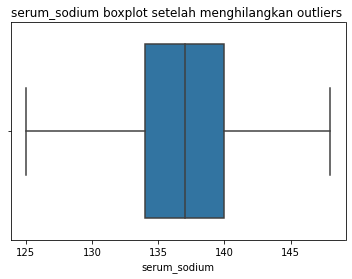

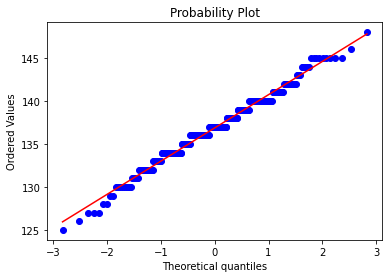

In [ ]:

var_out1 = df_copy.serum_sodium.quantile(.25)
var_out2 = df_copy.serum_sodium.quantile(.75)
IQR = var_out2 - var_out1
filter = (df_copy.serum_sodium >= var_out1 - 1.5 * IQR) & (df_copy.serum_sodium <= var_out2 + 1.5 *IQR)

sns.boxplot(df_copy.loc[filter].serum_sodium,orient='v')
plt.title('serum_sodium boxplot setelah menghilangkan outliers ')
fig = plt.figure()

res = stats.probplot(df_copy.loc[filter].serum_sodium, plot=plt)
plt.show()
df_copy.serum_sodium = df_copy[filter]

In [ ]:

df_copy = df_copy.dropna()
x_selected_clean = df_copy[df_copy.columns.drop('DEATH_EVENT')]
y_selected_clean = df_copy['DEATH_EVENT']


scale = MinMaxScaler(feature_range=(0, 1))
x_selected_clean[x_selected_clean.columns] = scale.fit_transform(x_selected_clean[x_selected_clean.columns])
x_train_selected_clean, x_test_selected_clean, y_train_selected_clean, y_test_selected_clean = train_test_split(x_selected_clean, y_selected_clean, test_size = 0.3, random_state = 0)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR =  LogisticRegression()
LR_x_train, LR_y_train, LR_x_test, LR_y_test = x_train_selected_clean, y_train_selected_clean, x_test_selected_clean, y_test_selected_clean
LR.fit(LR_x_train, LR_y_train)
LR_y_pred = LR.predict(LR_x_test)

Logistic_Regression_Acc = accuracy_score(LR_y_test, LR_y_pred)

In [ ]:
print(f'Logistic Regression Accuracy          : {Logistic_Regression_Acc}')
confusion_matrix(LR_y_test, LR_y_pred)

Logistic Regression Accuracy          : 0.8875


array([[61,  0],
       [ 9, 10]])

# **K Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN_x_train, KNN_y_train, KNN_x_test, KNN_y_test = x_train_selected_clean, y_train_selected_clean, x_test_selected_clean, y_test_selected_clean
KNN.fit(KNN_x_train, KNN_y_train)
KNN_y_pred = KNN.predict(KNN_x_test)

KNN_Acc = accuracy_score(KNN_y_test, KNN_y_pred)

In [ ]:
print(f'K Nearest Neighbour Accuracy          : {KNN_Acc}')
confusion_matrix(KNN_y_test, KNN_y_pred)

K Nearest Neighbour Accuracy          : 0.8625


array([[56,  5],
       [ 6, 13]])

# **SVM**

In [ ]:
SVM = svm.SVC(kernel = 'linear')
SVM_x_train, SVM_y_train, SVM_x_test, SVM_y_test = x_train_selected_clean, y_train_selected_clean, x_test_selected_clean, y_test_selected_clean
SVM.fit(SVM_x_train, SVM_y_train)
SVM_y_pred = SVM.predict(SVM_x_test)

SVM_Acc = accuracy_score(SVM_y_test, SVM_y_pred)

In [ ]:
print(f'SVM Accuracy          : {SVM_Acc}')
confusion_matrix(SVM_y_test, SVM_y_pred)

SVM Accuracy          : 0.8625


array([[59,  2],
       [ 9, 10]])

# **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_x_train, RF_y_train, RF_x_test, RF_y_test = x_train_selected_clean, y_train_selected_clean, x_test_selected_clean, y_test_selected_clean
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(RF_x_train, RF_y_train)
RF_y_pred = RF.predict(RF_x_test)

RF_Acc = accuracy_score(RF_y_test, RF_y_pred)

In [ ]:
print(f'Random Forest Accuracy          : {RF_Acc}')
confusion_matrix(RF_y_test, RF_y_pred)

Random Forest Accuracy          : 0.8625


array([[57,  4],
       [ 7, 12]])